# Homework 5

1. Use the PyMC3 code presented in class.  The code specifies that my prior beliefs (or prior probability) over $\alpha$ and $\beta$ are diffuse normal.  (Diffuse in this case simply means a large variance relative the possible support for the parameters of interest.)  Suppose, as a researcher, you wish to express your prior beliefs as being uniform rather than diffuse normal.  In particular, suppose you wish to express your prior belief that $\alpha$ is uniform(-2, 2) and that $\beta$ is uniform(0, 4).  Adjust the code to specify these prior beliefs, and run the code using the CAPM with AAPL.  Compare your MCMC simulations of the posteriors for $\alpha$ and $\beta$ to those presented in class.  Given your results with different priors, how would you assess the role of priors in the MCMC simulation of the posteriors for $\alpha$ and $\beta$?  
2. Consider your project proposals approved and begin working on your Foundations project.

In [1]:
%matplotlib inline

In [8]:
import Quandl
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Get Nasdaq/appl data
aapl_all = Quandl.get("YAHOO/AAPL", trim_start="2010-1-1", trim_end="2015-09-18")
nasdaq_all = Quandl.get("NASDAQOMX/COMP", trim_start="2010-1-1", trim_end="2015-09-18")
aapl = aapl_all['Adjusted Close']
nasdaq = nasdaq_all['Index Value']
aapl_returns = np.log(aapl / aapl.shift(1))
nasdaq_returns = np.log(nasdaq / nasdaq.shift(1))
aapl_returns = aapl_returns.dropna()
nasdaq_returns = nasdaq_returns.dropna()

In [24]:
# Run with normal priors
with pm.Model() as model:
    # alpha, beta, and sigma are the hyperparameters over which we have our priors, in this case they are flat priors.    
    alpha = pm.Normal('alpha', mu=0, sd=20)
    beta = pm.Normal('beta', mu=0, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    
    # y_est is the specification of the Bayesian model to be estimated.  It is simply our CAPM.
    y_est = alpha + beta * nasdaq_returns
    
    # likelihood is the likelihood function, here it is normal to be used with conjugate priors.    
    likelihood = pm.Normal('y', mu=y_est, sd=sigma, observed=aapl_returns)
    
    # We use the Maximum a Posteriori (MAP) values as starting values for the MCMC sampling.
    start = pm.find_MAP()
    step = pm.NUTS(state=start)
    trace = pm.sample(4000, step, start=start, progressbar=True)

 [-----------------100%-----------------] 4000 of 4000 complete in 19.5 sec

In [25]:
# Run with uniform priors
with pm.Model() as model:
    # alpha, beta, and sigma are the hyperparameters over which we have our priors, in this case they are flat priors.    
    alpha = pm.Uniform('alpha', lower=-2, upper=2)
    beta = pm.Uniform('beta', lower=0, upper=4)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    
    # y_est is the specification of the Bayesian model to be estimated.  It is simply our CAPM.
    y_est = alpha + beta * nasdaq_returns
    
    # likelihood is the likelihood function, here it is normal to be used with conjugate priors.    
    likelihood = pm.Normal('likelihood', mu=y_est, sd=sigma, observed=aapl_returns)
    
    # We use the Maximum a Posteriori (MAP) values as starting values for the MCMC sampling.
    start = pm.find_MAP()
    step = pm.NUTS(state=start)
    trace2 = pm.sample(4000, step, start=start, progressbar=True)

 [-----------------100%-----------------] 4000 of 4000 complete in 40.4 sec

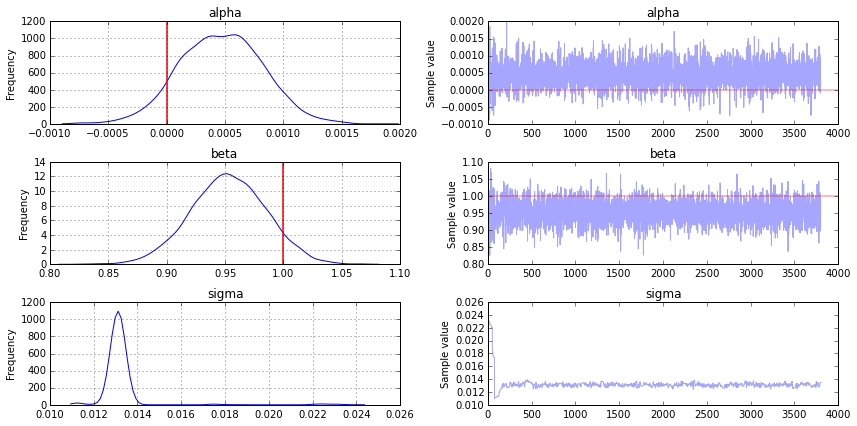

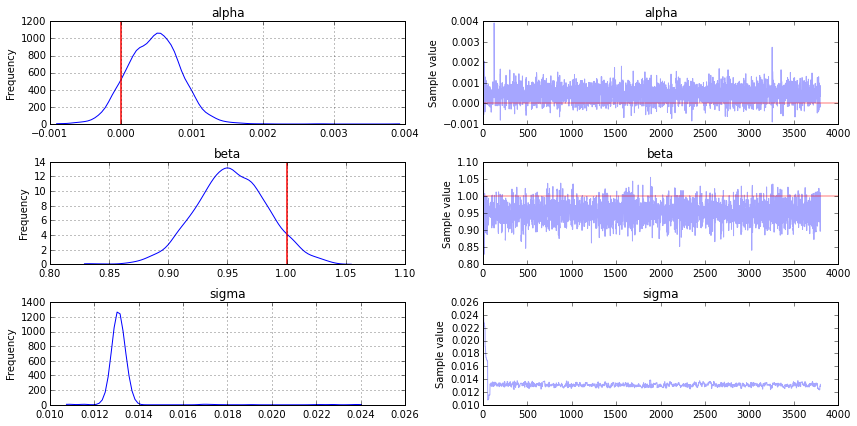

In [27]:
fig = pm.traceplot(trace[199:], lines={'alpha': 0, 'beta': 1}, vars=['alpha', 'beta', 'sigma'])
plt.figure(figsize = (12, 10))
fig = pm.traceplot(trace2[199:], lines={'alpha': 0, 'beta': 1}, vars=['alpha', 'beta', 'sigma'])
plt.figure(figsize = (12, 10))

The priors don't make a big difference in the posterior given enough iterations of sampling.  They aren't identical, but we wouldn't expect that even for the same priors given the randomess of the process.